In [1]:
#Author Alex J. Yang, alexjieyang@outlook.com
import numpy as np
import pandas as pd
import itertools
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm

def bootstrapped(data,n_resamples = 5):
    data = (data,)
    bootstrap_ci = scipy.stats.bootstrap(data, np.mean, confidence_level=0.95,n_resamples=n_resamples,
                         random_state=1, method='percentile')
    return bootstrap_ci.confidence_interval[1] - np.mean(data)

In [2]:
savepath = 

In [3]:
df = pd.read_csv()

In [6]:
df['PaperID'].nunique()

6199531

In [7]:
df['AuthorID'].nunique()

1111508

In [4]:
df['lnC'] = df['Citation_Count5'].apply(lambda x:np.log(x+1))
df['D'] = df['Disruption5'].apply(lambda x:1 if x>0 else 0)
df['Female'] = df['P(gf)'].apply(lambda x:1 if x>0.5 else 0)
df["Team_Size2"] = df["Team_Size"].apply(lambda x:x if x<10 else 10)

In [10]:
len(df.loc[(df['Year']==1990)&(df['AuthorSequenceNumber']!=1)&(df['P(gf)']>0.5 )])/len(df.loc[(df['Year']==1990)&(df['AuthorSequenceNumber']!=1)])

0.101418589879314

In [11]:
len(df.loc[(df['Year']==2016)&(df['AuthorSequenceNumber']!=1)&(df['P(gf)']>0.5 )])/len(df.loc[(df['Year']==2016)&(df['AuthorSequenceNumber']!=1)])

0.21208522909712166

In [5]:
df.columns

Index(['PaperID', 'AuthorID', 'AuthorSequenceNumber', 'Year',
       'Citation_Count5', 'Reference_Count', 'Team_Size', 'RaoStirling_Ref',
       'JournalID', 'FieldID', 'FieldID2', 'P(gf)', 'Age', 'InterDisTeam',
       'International', 'Past_Pub', 'Past_Hit', 'FocalField', 'Funding',
       'Disruption5', 'Atyp', 'AffiliationID', 'AffRank', 'CountryID', 'lnC',
       'D', 'Female', 'Team_Size2'],
      dtype='object')

In [5]:
df1=df.loc[(df['AuthorSequenceNumber']==1)&(df['P(gf)']>0.5 )]
df2=df.loc[(df['AuthorSequenceNumber']==1)&(df['P(gf)']<=0.5 )]
df3=df.loc[(df['AuthorSequenceNumber']!=1)&(df['P(gf)']>0.5 )]
df4=df.loc[(df['AuthorSequenceNumber']!=1)&(df['P(gf)']<=0.5 )]

In [8]:
# dffield = pd.read_csv(r'E:\Data\SciSciNet\Fields\SciSciNet_Fields.csv.zip')
# dffield = dffield[dffield['Field_Type']=='Top']

# df['Field_Name'] = df['FieldID'].map(dffield.set_index('FieldID')['Field_Name'])

In [9]:
df1 = df[df['AuthorSequenceNumber']==1]
df0 = df[df['AuthorSequenceNumber']!=1]

# Functions

In [10]:
from matplotlib.ticker import FormatStrFormatter

In [11]:
def set_fig_(ax , xlabel=0, ylabel=0, iflegend=False):
    if xlabel!=0:
        ax.set_xlabel(xlabel,size = 16)
    else:
        ax.set_xlabel('')
    if ylabel!=0:
        ax.set_ylabel(ylabel,size = 16)
    else:
        ax.set_ylabel('')
    if iflegend:
        ax.legend(frameon =False,fontsize = 16,ncol=2,bbox_to_anchor=(1, 0), loc=3, borderaxespad=0)
    ax.tick_params(axis='x',labelsize=16)
    ax.tick_params(axis='y',labelsize=16)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_linewidth(2)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

# Fig1 #Papers #Female

In [12]:
d1 = df1.groupby(['Year','FieldID'])['Female'].mean().reset_index()
d2 = df0.groupby(['Year','FieldID'])['Female'].mean().reset_index()

In [13]:
d4 = df1.groupby(['Year','Team_Size2'])['Female'].mean().reset_index()
d5 = df0.groupby(['Year','Team_Size2'])['Female'].mean().reset_index()

In [14]:
d6 = df1.groupby(['Year','AffRank'])['Female'].mean().reset_index()
d7 = df0.groupby(['Year','AffRank'])['Female'].mean().reset_index()

In [15]:
colors1 = sns.color_palette("husl", 13)
colors2 = sns.color_palette("rocket", 10)
colors3 = sns.color_palette("mako", 8)
fieldIDlst = [2.05649164e+08,3.94323040e+07, 1.27313418e+08, 1.27413603e+08, 4.10081480e+07,1.21332964e+08, 3.39235470e+07, 1.92562407e+08,1.85592680e+08, 8.68032400e+07, 7.19241000e+07]
fieldNamelst = ['Geography', 'Environmental s.','Geology', 'Engineering', 'Computer s.', 'Physics','Mathematics', 'Materials s.', 'Chemistry','Biology', 'Medicine']
labellst2 = [' = 1',' = 2',' = 3',' = 4',' = 5',' = 6',' = 7',' = 8',' = 9',' >= 10']
labellst3 = ['1-50','51-100','101-200','201-500','501-1000','1001-2000','2001-5000','>5000']

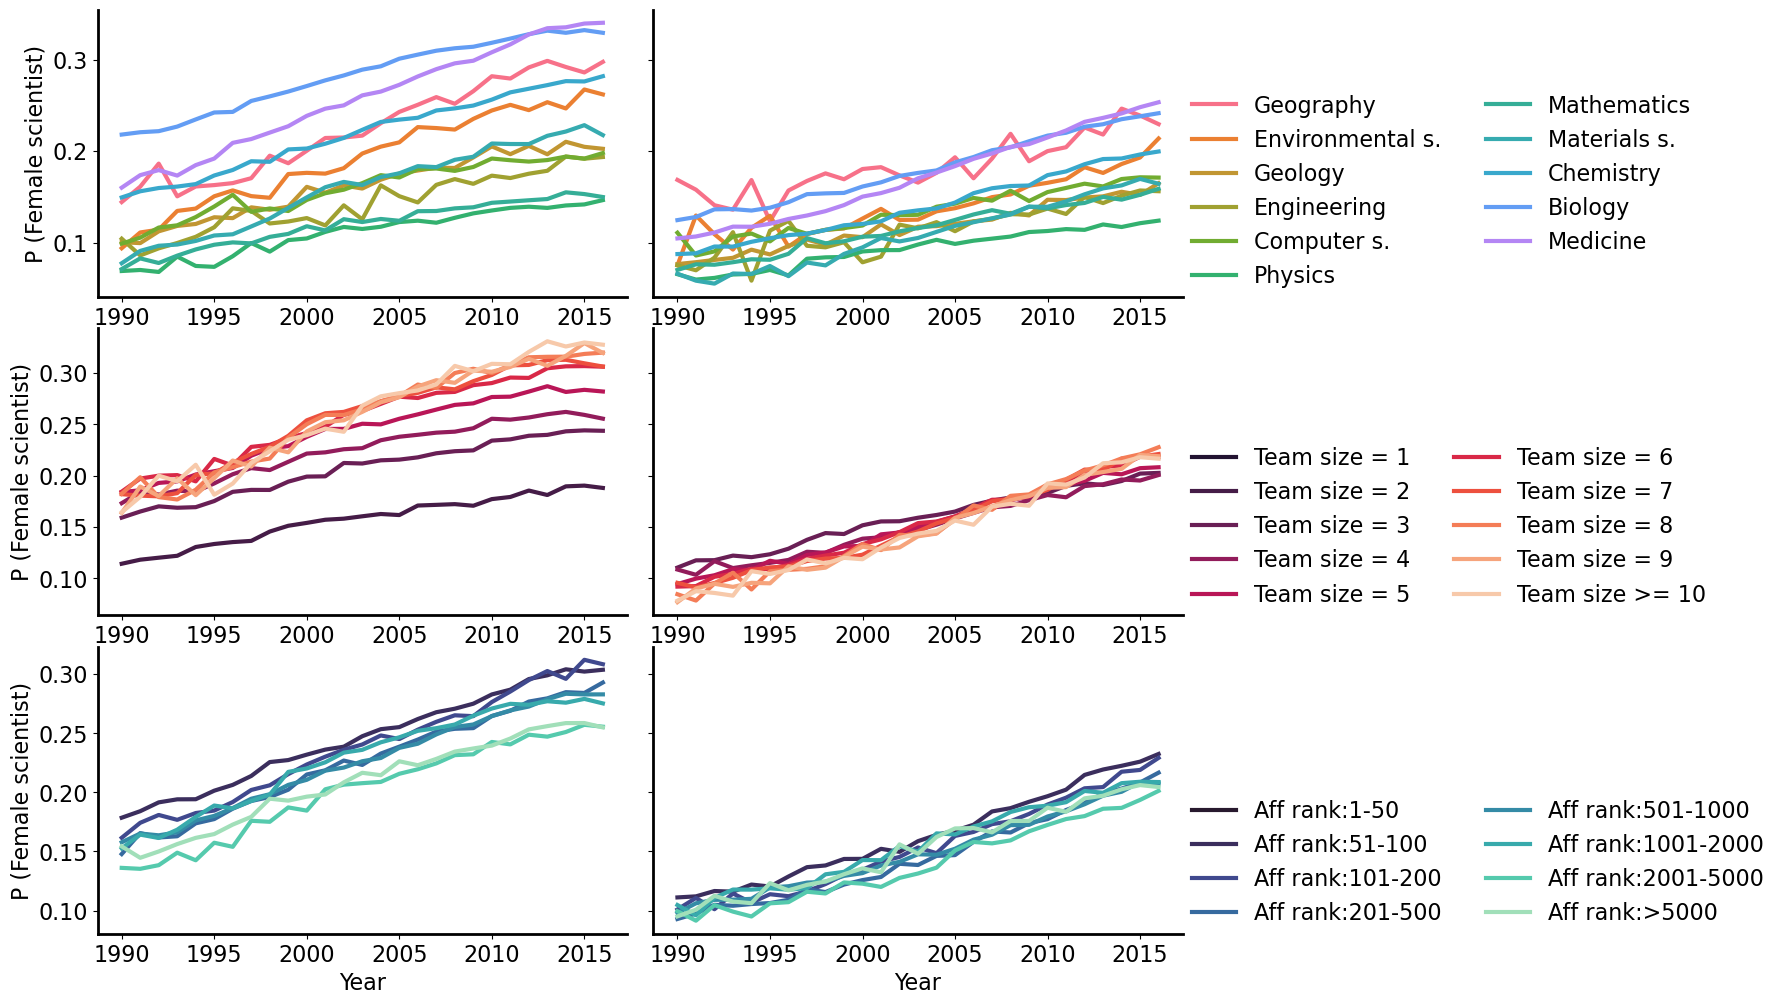

In [16]:
plt.subplots(3,2,figsize=(14,12),sharey='row')
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.05,hspace=0.11)

ax = plt.subplot(3,2,1)
for i in range(len(fieldIDlst)):
    ax.plot(d1.loc[d1['FieldID']==fieldIDlst[i] , 'Year'],d1.loc[d1['FieldID']==fieldIDlst[i] , 'Female'] , color = colors1[i], lw=3)
    set_fig_(ax, ylabel='P (Female scientist)', iflegend=False)
    # plt.title('First author',fontsize = 16)
ax = plt.subplot(3,2,2)
for i in range(len(fieldIDlst)):
    ax.plot(d2.loc[d2['FieldID']==fieldIDlst[i] , 'Year'],d2.loc[d2['FieldID']==fieldIDlst[i] , 'Female'] , color = colors1[i], lw=3 , label = fieldNamelst[i])
    set_fig_(ax, iflegend=True)
    # plt.title('Last author',fontsize = 16)
ax = plt.subplot(3,2,3)
for i in range(10):
    ax.plot(d4.loc[d4['Team_Size2']==i , 'Year'],d4.loc[d4['Team_Size2']==i , 'Female'] , color = colors2[i], lw=3)
    set_fig_(ax, ylabel='P (Female scientist)', iflegend=False)
ax = plt.subplot(3,2,4)
for i in range(10):
    ax.plot(d5.loc[d5['Team_Size2']==i , 'Year'],d5.loc[d5['Team_Size2']==i , 'Female'] , color = colors2[i], lw=3, label = 'Team size'+labellst2[i])
    set_fig_(ax, iflegend=True)

ax = plt.subplot(3,2,5)
for i in range(8):
    ax.plot(d6.loc[d6['AffRank']==i , 'Year'],d6.loc[d6['AffRank']==i , 'Female'] , color = colors3[i], lw=3)
    set_fig_(ax, ylabel='P (Female scientist)', xlabel='Year', iflegend=False)
ax = plt.subplot(3,2,6)
for i in range(8):
    ax.plot(d7.loc[d7['AffRank']==i , 'Year'],d7.loc[d7['AffRank']==i , 'Female'] , color = colors3[i], lw=3, label = 'Aff rank:'+labellst3[i])
    set_fig_(ax, xlabel='Year', iflegend=True)

plt.savefig(savepath + "1.pdf",bbox_inches = 'tight')